Carregue os dados spikes2.mat. Esse arquivo contém a variável spikes, que são os tempos de disparos de um neurônio durante 30s.

In [47]:
import scipy.io as sio
import matplotlib.pyplot as plt
import warnings
from matplotlib.pyplot import xlabel, ylabel, plot, show, title
from matplotlib import rcParams
rcParams['figure.figsize'] = (12,3)

data = sio.loadmat('spikes-2.mat')
Spikes = data['Spikes'][0]

Calcule a frequência de disparos

In [48]:
T = 30
n = len(Spikes)
f = n / T
print('f =', f)

f = 23.333333333333332


Faça um gráfico dos spikes trains dos 30s




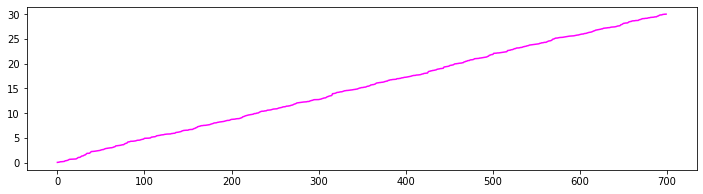

In [49]:
plot(Spikes, color = "fuchsia")
show()

Examine intervalos de 1s. Você consegue encontrar bursts de disparos?

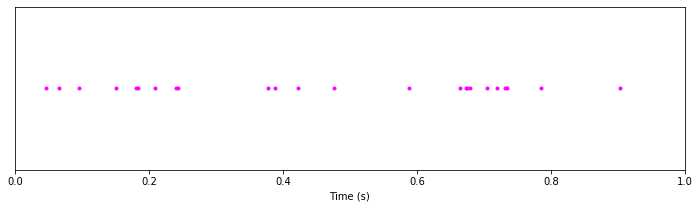

Resposta = Sim, é possível a observação de brusts


In [50]:
import numpy as np  
plot(Spikes, np.ones_like(Spikes), '.', color = "fuchsia")  
plt.xlim([0, 1])                                
plt.xlabel('Time (s)')                          
plt.yticks([])                                  
show()

print("Resposta = Sim, é possível a observação de brusts")

Faça o gráfico do histograma do ISI

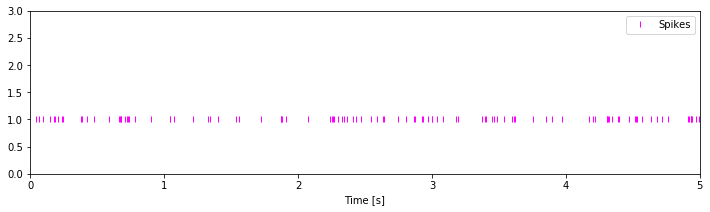

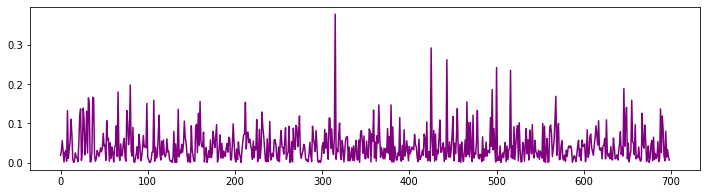

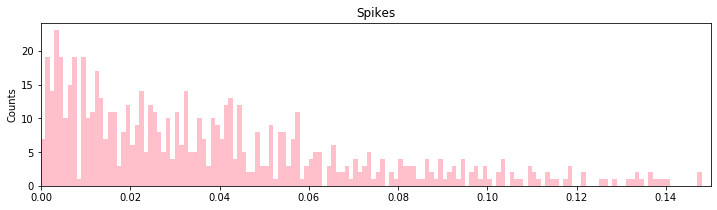

In [51]:
plot(Spikes, np.ones_like(Spikes), '|', color = "fuchsia")    
plt.xlim([0, 5])              
plt.ylim([0, 3])              
xlabel('Time [s]')            
plt.legend({'Spikes'})   
show()

ISIsSpikes = np.diff(Spikes)    
plot(ISIsSpikes, color = "purple")
show()

ISIsSpikes = np.diff(Spikes)
bins = np.arange(0, .5, 1e-3)
plt.hist(ISIsSpikes, bins, color = "pink")        
plt.xlim([0, 0.15])            
ylabel('Counts')               
title('Spikes')             
plt.show()

Faça o gráfico contando a quantidade de spikes e dividindo o tempo em 50ms

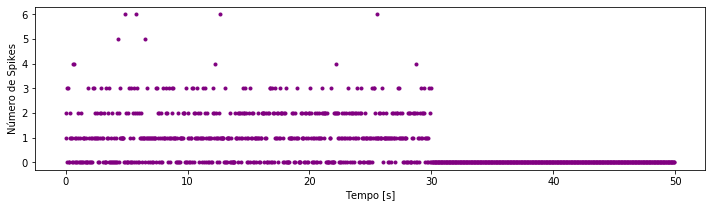

In [52]:
time_bins = np.arange(0, 50, 0.05)                    
Increments50, _ = np.histogram(Spikes, time_bins)  
plot(time_bins[:-1], Increments50, '.', color = "purple" )               
xlabel('Tempo [s]')                                       
ylabel('Número de Spikes')
show()


Calcule o fator de Fano. Como ele se compara a um processo de Poisson?

FF50S = 1.4592992992992995


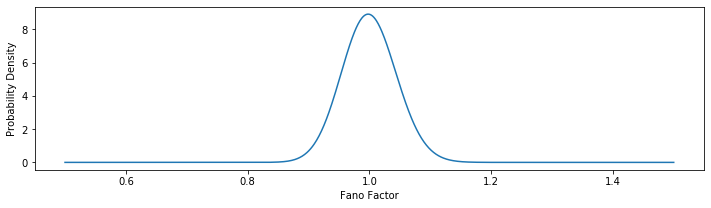

Pelo valor encontrado no Fator de Fano e sua significância, esses spikes são mais variáveis que um processo de Poisson.


In [53]:
FF50S = Increments50.var() / Increments50.mean()
print('FF50S =', FF50S)


from scipy.stats import gamma   
N = Increments50.shape[0];  
shape = (N - 1) / 2            
scale = 2 / (N - 1)             
FF = np.linspace(.5, 1.5, 1000) 
Y = gamma.pdf(FF, shape, 
              scale=scale)      
plot(FF,Y);                     
xlabel('Fano Factor')          
ylabel('Probability Density')  
show()



print("Pelo valor encontrado no Fator de Fano e sua significância, esses spikes são mais variáveis que um processo de Poisson.")


Calcule a autocorrelação da quantidade de spikes. Use um lag de 50ms e construa os IC. Você observa autocorrelação significativa?

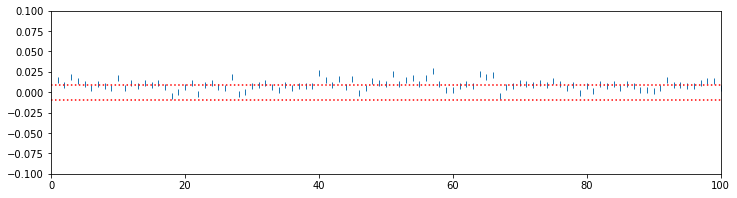

In [54]:
def autocorr(x, lags):
    xcorr = np.correlate(x - x.mean(), x - x.mean(), 'full')  
    xcorr = xcorr[xcorr.size//2:] / xcorr.max()               
    return xcorr[:lags+1]                                     
    
autocorr(Increments50, 3)

time_bins = np.arange(0, 50, 0.001)                    
Increments50, _ = np.histogram(Spikes, time_bins) 
ACFLow = autocorr(Increments50, 100)                 

plot(ACFLow, '|')        
N1 = len(Increments50)                    
sig = 2 / np.sqrt(N1)                       
plot([0, 100], [sig, sig], 'r:')           
plot([0, 100], [-sig, -sig], 'r:')
plt.xlim([0, 100])                         
plt.ylim([-.1, .1])                        
show()


Aproxime os dados com um modelo de Poisson, encontrando um lambda. Avalie a qualidade do modelo. O modelo de Poisson representa bem os dados?

/home/aluno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


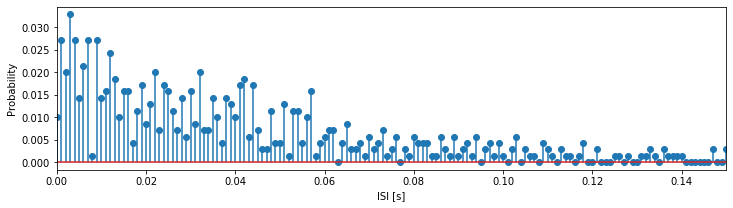

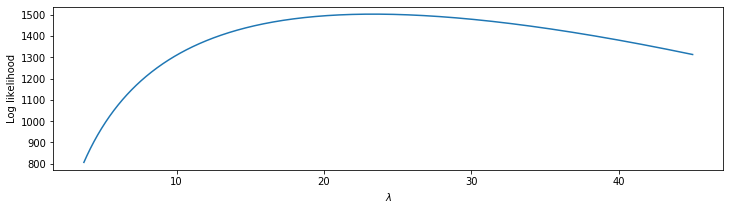

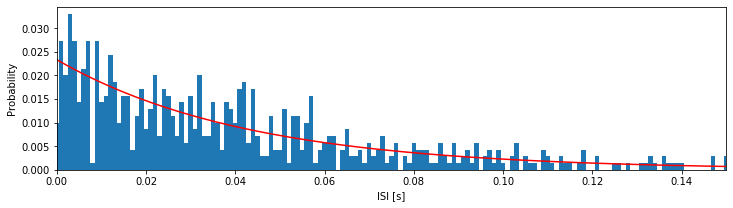

In [56]:
bins = np.arange(0, .5, 0.001)           
counts, _ = np.histogram(ISIsSpikes, bins)  
prob = counts / len(ISIsSpikes)             
fig, ax = plt.subplots()                 
ax.stem(bins[:-1], prob)                 
ax.set_xlim([0, 0.15])                   
xlabel('ISI [s]')                        
ylabel('Probability')
show()

l = 5                                   
model = l * np.exp(-l * bins) * 0.001    
ax.plot(bins, model, 'g')           
fig

lambdas = l * np.exp(-l * bins)*9
N3 = len(ISIsSpikes)
l = N3 * np.log(lambdas) - lambdas * sum(ISIsSpikes)
plot(lambdas, l)  
xlabel('$\lambda$')
ylabel('Log likelihood')
show()

bins = np.arange(0, .5, 0.001)            
counts, _ = np.histogram(ISIsSpikes, bins)   
prob = counts / len(ISIsSpikes)              
plt.bar(bins[:-1], prob, width=0.001)     
lbda = 1 / ISIsSpikes.mean()                 
model = lbda * np.exp(-lbda * bins) * 0.001  
plot(bins, model, 'r')                    
plt.xlim([0, 0.15])                       
xlabel('ISI [s]')                         
ylabel('Probability')                     
show()
